In [1]:
import pandas as pd
passaporti_raw = pd.read_csv('data/dati_corretti.csv')
mapping_mestieri = pd.read_csv("data/mapping_lavori_mestieri.csv")
mapping_espatri = pd.read_csv("data/mapping_espatri.csv")
mapping_luoghi = pd.read_csv("data/mapping_luoghi.csv")
rinnovi = pd.read_csv(
    "data/branch-1__rinnovi-inserire-un-branch-per-ogni-rinnovo-presente.csv")


# Mestieri
## funzioni per i mestieri

In [2]:
def getLower(value): 
    value_lower = ""
    try:
        value_lower = value.lower()
    except:
        pass
    return (value_lower)


In [3]:
def getLavoro(mestiere): 
    lavoro = "NO CATEGORIA"
    try:
        lavoro =  mapping_mestieri[mapping_mestieri.mestiere ==
                     mestiere]['raggruppamento'].values[0]
    except:
        pass
    return (lavoro)


In [4]:
def getMestiereCorretto(mestiere):
    corretto = mestiere
    try:
        trovato = mapping_mestieri[mapping_mestieri.mestiere ==
                                   mestiere]['corretto'].values[0]
        if pd.isna(trovato):
            corretto = mestiere
        else: 
            corretto = trovato
    except:
        print("caccamo")
        corretto = mestiere
    return (corretto)

In [5]:
passaporti = passaporti_raw.copy()

## raggruppamento mestieri

In [6]:
columns = ["sesso", "mestiere", "espatri", "nome"]
for c in columns:
    try:
        passaporti[c] = passaporti[c].str.strip()
    except Exception:
        pass
    
columns = ["mestiere", "raggruppamento"]
for c in columns:
    try:
        mapping_mestieri[c] = mapping_mestieri[c].str.strip()
    except Exception:
        pass


## incrocio con rinnovi

In [7]:
rinnovi.rename(columns={"ec5_branch_owner_uuid": "ec5_uuid"}, inplace=True)


In [8]:
rinnovi = rinnovi.drop_duplicates()

In [9]:
passaporti.shape

(12585, 20)

In [10]:
passaporti = passaporti.drop_duplicates()

In [11]:
passaporti_rinnovati = passaporti[passaporti.rinnovi == 'Sì']

In [12]:
passaporti_rinnovati.shape

(4360, 20)

In [13]:
passaporti['rinnovi'] = passaporti.rinnovi.fillna("No")

In [14]:
passaporti_no_rinnovi = passaporti_no_rinnovi = [passaporti['rinnovi'] == "No"]

In [15]:
merge_passa_rinnovi = passaporti_rinnovati.merge(
    rinnovi, on="ec5_uuid", how="left")

In [16]:
merge_passa_rinnovi.shape


(8636, 28)

In [17]:
merge_passa_rinnovi


,ec5_uuid,created_at_x,uploaded_at_x,title_x,numero_busta,nome,data_nascita,luogo_nascita,sesso,mestiere,...,partial_answers,foto_documento,ec5_branch_uuid,created_at_y,uploaded_at_y,title_y,data_rinnovo,validita_rinnovo,nuovi_espatri,note_esp_rinnovi
0,000d4920-0d9d-11ec-8c1c-4165990940f0,2021-09-04T16:27:30.354Z,2021-09-04T16:31:17.000Z,000d4920-0d9d-11ec-8c1c-4165990940f0,31.0,Dallapiccola Domenico,1869.0,Baselga di Pinè,M,Giornaliero,...,NaN,https://five.epicollect.net/api/media/mapping-...,2301a660-0d9d-11ec-8c1c-4165990940f0,2021-09-04T16:28:28.998Z,2021-09-04T16:31:19.000Z,2301a660-0d9d-11ec-8c1c-4165990940f0,1889.0,1,"Austria-Ungheria, Germania",NaN
1,0012acf0-7aa1-11ec-b26f-9b079aeb29aa,2022-01-21T10:00:45.119Z,2022-01-21T10:02:29.000Z,0012acf0-7aa1-11ec-b26f-9b079aeb29aa,39.0,Gottardi Luigi,1858.0,Vervò,M,giornaliero,...,NaN,NaN,33983860-7aa1-11ec-b26f-9b079aeb29aa,2022-01-21T10:02:11.558Z,2022-01-21T10:02:30.000Z,33983860-7aa1-11ec-b26f-9b079aeb29aa,1895.0,6 mesi,Europa,NaN
2,0012acf0-7aa1-11ec-b26f-9b079aeb29aa,2022-01-21T10:00:45.119Z,2022-01-21T10:02:29.000Z,0012acf0-7aa1-11ec-b26f-9b079aeb29aa,39.0,Gottardi Luigi,1858.0,Vervò,M,giornaliero,...,NaN,NaN,2a34cef0-7aa1-11ec-b26f-9b079aeb29aa,2022-01-21T10:01:55.807Z,2022-01-21T10:02:30.000Z,2a34cef0-7aa1-11ec-b26f-9b079aeb29aa,1890.0,8 mesi,Austria-Ungheria,NaN
3,0012acf0-7aa1-11ec-b26f-9b079aeb29aa,2022-01-21T10:00:45.119Z,2022-01-21T10:02:29.000Z,0012acf0-7aa1-11ec-b26f-9b079aeb29aa,39.0,Gottardi Luigi,1858.0,Vervò,M,giornaliero,...,NaN,NaN,21c00b40-7aa1-11ec-b26f-9b079aeb29aa,2022-01-21T10:01:41.620Z,2022-01-21T10:02:31.000Z,21c00b40-7aa1-11ec-b26f-9b079aeb29aa,1889.0,7 mesi,Austria-Ungheria,NaN
4,0012acf0-7aa1-11ec-b26f-9b079aeb29aa,2022-01-21T10:00:45.119Z,2022-01-21T10:02:29.000Z,0012acf0-7aa1-11ec-b26f-9b079aeb29aa,39.0,Gottardi Luigi,1858.0,Vervò,M,giornaliero,...,NaN,NaN,19d697a0-7aa1-11ec-b26f-9b079aeb29aa,2022-01-21T10:01:28.346Z,2022-01-21T10:02:32.000Z,19d697a0-7aa1-11ec-b26f-9b079aeb29aa,1901.0,3,Europa,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,ff7dd560-a04f-11ec-a57d-ef6a1df2a6db,2022-03-10T08:56:39.094Z,2022-03-10T08:57:44.000Z,ff7dd560-a04f-11ec-a57d-ef6a1df2a6db,45.0,Vincenzi Giacomo,1870.0,Segonzano,M,giornaliero,...,NaN,NaN,1ec975f0-a050-11ec-a57d-ef6a1df2a6db,2022-03-10T08:57:31.599Z,2022-03-10T08:57:44.000Z,1ec975f0-a050-11ec-a57d-ef6a1df2a6db,1895.0,4 mesi,Europa,NaN
8632,ff7dd560-a04f-11ec-a57d-ef6a1df2a6db,2022-03-10T08:56:39.094Z,2022-03-10T08:57:44.000Z,ff7dd560-a04f-11ec-a57d-ef6a1df2a6db,45.0,Vincenzi Giacomo,1870.0,Segonzano,M,giornaliero,...,NaN,NaN,13ee60a0-a050-11ec-a57d-ef6a1df2a6db,2022-03-10T08:57:13.386Z,2022-03-10T08:57:45.000Z,13ee60a0-a050-11ec-a57d-ef6a1df2a6db,1890.0,1,Europa,NaN
8633,ffab48c0-77a4-11ec-acd5-37bba7388574,2022-01-17T14:51:48.940Z,2022-01-17T14:54:30.000Z,ffab48c0-77a4-11ec-acd5-37bba7388574,48.0,Fronchetti Anselmo,1844.0,Torra,M,giornaliero,...,NaN,NaN,477100a0-77a5-11ec-acd5-37bba7388574,2022-01-17T14:53:49.354Z,2022-01-17T14:54:31.000Z,477100a0-77a5-11ec-acd5-37bba7388574,1894.0,3,Europa,NaN
8634,ffe39390-1b9e-11ec-8734-07f8d784ff3d,2021-09-22T12:17:05.353Z,2021-09-22T12:18:55.000Z,ffe39390-1b9e-11ec-8734-07f8d784ff3d,21.0,Nardelli Carlotta,1863.0,Trento,F,serva,...,NaN,NaN,34622500-1b9f-11ec-8734-07f8d784ff3d,2021-09-22T12:18:33.424Z,2021-09-22T12:18:55.000Z,34622500-1b9f-11ec-8734-07f8d784ff3d,1882.0,3,"Austria-Ungheria, Italia",NaN


## pulizia campi inutili

In [18]:
del passaporti["ec5_uuid"]
del passaporti["created_at"]
del passaporti["uploaded_at"]
del passaporti["title"]


In [19]:
del merge_passa_rinnovi["ec5_uuid"]
del merge_passa_rinnovi["created_at_x"]
del merge_passa_rinnovi["uploaded_at_x"]
del merge_passa_rinnovi["title_x"]
del merge_passa_rinnovi["ec5_branch_uuid"]
del merge_passa_rinnovi["created_at_y"]
del merge_passa_rinnovi["uploaded_at_y"]
del merge_passa_rinnovi["title_y"]


## mestieri minuscoli

In [20]:
passaporti['mestiere'] = passaporti.mestiere.apply(lambda x: getLower(x))
merge_passa_rinnovi['mestiere'] = passaporti.mestiere.apply(
    lambda x: getLower(x))


In [21]:
mapping_mestieri['mestiere'] = mapping_mestieri.mestiere.apply(
    lambda x: getLower(x))


## raggruppamento mestieri

In [22]:
passaporti['lavoro'] = passaporti['mestiere'].apply(lambda x: getLavoro(x))

In [23]:
passaporti['mestiere_corretto'] = passaporti.mestiere.apply(
    lambda x: getMestiereCorretto(x))


# Rimuovi doppioni

In [24]:
passaporti.drop_duplicates(inplace=True)

In [25]:
merge_passa_rinnovi.drop_duplicates(inplace=True)

## pulizia spazi vuoti

In [26]:
columns = ["sesso","mestiere","espatri","nome"]
for c in columns: 
    try:
        passaporti[c] = passaporti[c].str.strip()
    except Exception:
        pass


In [27]:
columns = ["sesso", "mestiere", "espatri", "nome"]
for c in columns:
    try:
        merge_passa_rinnovi[c] = passaporti[c].str.strip()
    except Exception:
        pass


# Pulizia dataset

In [28]:
passaporti_completi = passaporti
passaporti_rinnovi_completi = merge_passa_rinnovi


In [29]:
del passaporti_completi["partial_answers"]
del passaporti_completi["foto_documento"]
del passaporti_completi["interpretazione"]
del passaporti_completi["note"]
del passaporti_completi['numero_busta']
del passaporti_completi["mestiere_espatrio"]


In [30]:
passaporti_completi.shape[0]


12532

In [31]:
merge_passa_rinnovi.shape[0]

8612

ERRORE

In [32]:
passaporti_completi_dropna = passaporti_completi.dropna()


In [33]:
passaporti_completi_dropna.shape[0]


10485

In [34]:
passaporti_incompleti = passaporti[passaporti.mestiere.isnull()]


In [35]:
passaporti_completi_dropna.to_excel("passaporti_completi.xlsx", index=False)


In [36]:
passaporti.shape[0]-passaporti_completi_dropna.shape[0]


2047

In [37]:
passaporti_completi_dropna.shape[0]


10485

In [38]:
passaporti_incompleti = passaporti_raw[~passaporti_raw.index.isin(
    list(passaporti_completi_dropna.index))]


In [39]:
del passaporti_incompleti["ec5_uuid"]
del passaporti_incompleti["created_at"]
del passaporti_incompleti["uploaded_at"]
del passaporti_incompleti["title"]


In [40]:
passaporti_incompleti.to_excel("passaporti_incompleti.xlsx", index=False)


In [41]:
passaporti_completi_dropna[passaporti_completi_dropna['lavoro']
                    == 'NO CATEGORIA']['mestiere'].unique()


array([], dtype=object)

In [42]:
max_len = 0
for idx, row in passaporti_completi.iterrows():
    try: 
        values = row['espatri'].split(", ")
        c = len(values)
        if c > max_len:
            max_len = c
    except:
        pass
    

In [43]:
max_len

6

In [44]:
def splitEspatri(value,idx):
    rvalue = ""
    try:
        values = value.split(", ")
        rvalue = values[idx]
    except Exception as e:
        if (e == "list index out of range"):
            rvalue = value
        pass
    return(rvalue.strip())


In [45]:
field = "espatri_"
for i in range(0,max_len):
    passaporti_completi[field + str(i)] =  passaporti_completi['espatri'].apply(lambda x: splitEspatri(x,i))


In [46]:
field = "espatri_"
luoghi = []
for i in range(0, max_len):
    luoghi.extend(list(passaporti_completi[field + str(i)].unique()))


In [47]:
luoghi = set(luoghi)


In [48]:
def getMigrazione(luogo):
    migrazione = ""
    try:
        migrazione = mapping_espatri[mapping_espatri.espatrio ==
                                 luogo]['raggruppamento'].values[0]
    except:
        pass
    return (migrazione)

In [49]:
field_migrazione = "migrazione_"
field_espatri = "espatri_"
for i in range(0,max_len):
    passaporti_completi[field_migrazione + str(i)] =  passaporti_completi[field_espatri + str(i)].apply(lambda x: getMigrazione(x))

In [50]:
indici_senza_espatrio = passaporti_completi[passaporti_completi['espatri_0'] == ""].index.to_list()


In [51]:
#passaporti_completi.drop(indici_senza_espatrio).shape[0]

In [52]:
passaporti_completi['eta'] = passaporti_completi.data - passaporti_completi.data_nascita

In [53]:
mapping_luoghi.raggruppamento.value_counts()

Alta Valsugana                              123
Val di Non                                   90
Valle dei Laghi                              54
Val di Cembra                                40
Valle dell'Adige                             38
Piana Rotaliana                              29
Italia                                       25
Val di Sole                                  23
Val dei Mocheni                              21
Bassa Valsugana                              18
Primiero                                     13
Alto Adige                                   12
Vallagarina                                  10
Valli Giudicarie                              6
Altopiano della Paganella                     5
Alto Garda                                    5
Val di Fiemme                                 4
Altopiano di Folgaria, Lavarone, Luserna      3
Germania                                      3
Valle del Chiese                              3
Valle di Cembra                         

In [54]:
mapping_luoghi[mapping_luoghi['luogo'] == "Peio"].raggruppamento.values[0]


'Val di Sole'

In [55]:
def getProvenienza(value):
    provenienza = ""
    try:
        provenienza = mapping_luoghi[mapping_luoghi['luogo'] == value].raggruppamento.values[0]
    except:
        pass
    return(provenienza)

In [56]:
def getLuogoNascitaCorretto(value):
    correto = ""
    try:
        correto = mapping_luoghi[mapping_luoghi['luogo']
                                     == value]['nome corretto'].values[0]
    except:
        pass
    return(correto)


In [57]:
passaporti_completi['provenienza'] = passaporti_completi.luogo_nascita.apply(lambda x: getProvenienza(x))


In [58]:
passaporti_completi['luogo_nascita_corretto'] = passaporti_completi.luogo_nascita.apply(
    lambda x: getLuogoNascitaCorretto(x))


In [59]:
def giorniValidita(validita,anno):
    giorni = 0
    if pd.isna(validita) == False:
        if validita.isnumeric():
            giorni = int(validita) * 365
        else:
            if validita.find(" ") > -1:
                validita = validita.split(" ")
                molteplicitatore = 30
                if validita[1] == "mesi":
                    giorni = int(validita[0]) * molteplicitatore
                elif (validita[1] == "giorni") or (validita[1] == "gironi"):
                    giorni = int(validita[0])
            else:
                if validita != "possidente":
                    if validita.find(".") > -1:
                        validita = validita.split(".")
                    else:
                        validita = validita.split("/")
                    g = validita[0]
                    m = validita[1]
                    a = validita[2]
                    giorni = int(m) * 30 + int(g) + int(anno) * 365                
    return(giorni)

In [60]:
passaporti_completi['durata_gg_passaporto'] = 0

In [61]:
for idx, row in passaporti_completi.iterrows():
    a = row['data']
    v = row['validita']
    gg = giorniValidita(v,a)
    #passaporti_completi[passaporti_completi.index==idx]['durata_gg_passaporto'] = gg
    passaporti_completi.loc[idx,'durata_gg_passaporto']  = gg

In [62]:
passaporti_completi['migrazione_extra_europa'] = 0
passaporti_completi['migrazione_europa'] = 0
passaporti_completi['migrazione_interna'] = 0

In [63]:
for idx, row in passaporti_completi.iterrows():
    campo = "migrazione_"
    totale = 6
    extra_europa = 0 
    interna = 0 
    europa = 0 
    for i in range(totale): 
        v = row[campo+ str(i)]
        if v == "extra europa":
            extra_europa +=1
        if v == 'europa':
            europa += 1
        if v == "interna":
            interna += 1
    passaporti_completi.loc[idx, 'migrazione_extra_europa'] = extra_europa
    passaporti_completi.loc[idx, 'migrazione_europa'] = europa
    passaporti_completi.loc[idx, 'migrazione_interna'] = interna


In [64]:
for idx, row in passaporti_completi.iterrows():
    campo = "migrazione_"
    totale = 6
    extra_europa = 0
    interna = 0
    europa = 0
    for i in range(totale):
        v = row[campo + str(i)]
        if v == "extra europa":
            extra_europa = 1 #sostituire += se si vuole la somma
        if v == 'europa':
            europa = 1  # sostituire += se si vuole la somma
        if v == "interna":
            interna = 1  # sostituire += se si vuole la somma
    passaporti_completi.loc[idx, 'migrazione_extra_europa'] = extra_europa
    passaporti_completi.loc[idx, 'migrazione_europa'] = europa
    passaporti_completi.loc[idx, 'migrazione_interna'] = interna


In [65]:
places = set(list(passaporti_completi.espatri_0.unique())
    +list(passaporti_completi.espatri_1.unique())
    +list(passaporti_completi.espatri_2.unique())
    +list(passaporti_completi.espatri_3.unique())
    +list(passaporti_completi.espatri_4.unique())
    +list(passaporti_completi.espatri_5.unique()))

In [66]:
places


{'',
 'Africa',
 'America',
 'Asia',
 'Austria',
 'Austria-Ungheria',
 'Bosnia-Erzegovina',
 "Esteri d'Europa",
 'Europa',
 'Francia',
 'Germania',
 'Italia',
 'Svizzera',
 'Turchia',
 'Ungheria'}

In [67]:
passaporti_completi['africa'] = 0
passaporti_completi['america'] = 0 
passaporti_completi['asia'] = 0
passaporti_completi['austria'] = 0 
passaporti_completi['austra_ungheria'] = 0
passaporti_completi['bosnia_erzegovina'] = 0
passaporti_completi['europa'] = 0
passaporti_completi['esteri_europa'] = 0 
passaporti_completi['francia'] = 0
passaporti_completi['germania'] = 0 
passaporti_completi['italia'] = 0
passaporti_completi['svizzera'] = 0
passaporti_completi['turchia'] = 0
passaporti_completi['ungheria'] = 0


In [68]:
for idx, row in passaporti_completi.iterrows():
    campo = "espatri_"
    totale = 5
    africa = 0
    america = 0
    asia = 0
    austria = 0
    austra_ungheria = 0  
    bosnia_erzegovina = 0 
    esteri_europa = 0 
    francia = 0
    germania= 0
    italia = 0
    svizzera = 0 
    ungheria = 0 
    turchia = 0
    europa = 0
    for i in range(totale+1):
        v = row[campo + str(i)]
        if v.strip() == "America":
            america += 1
        if v.strip() == 'Africa':
            africa += 1
        if v.strip() == "Asia":
            asia += 1
        if v.strip() == "Austria":
            austria += 1
        if v.strip() == 'Austria-Ungheria':
            austra_ungheria += 1
        if v.strip() == "Bosnia-Erzegovina":
            bosnia_erzegovina += 1
        if v.strip() == "Esteri d'Europa":
            esteri_europa += 1
        if v.strip() == 'Francia':
            francia += 1
        if v.strip() == "Germania":
            germania += 1
        if v.strip() == 'Italia':
            italia += 1
        if v.strip() == "Svizzera":
            svizzera += 1
        if v.strip() == 'Ungheria':
            ungheria += 1
        if v.strip() == "Turchia":
            turchia += 1
        if v.strip() == "Europa":
            europa += 1
    passaporti_completi.loc[idx,'africa'] = africa
    passaporti_completi.loc[idx, 'america'] = america
    passaporti_completi.loc[idx, 'asia'] = asia
    passaporti_completi.loc[idx, 'austria'] = austria
    passaporti_completi.loc[idx, 'austra_ungheria'] = austra_ungheria
    passaporti_completi.loc[idx, 'bosnia_erzegovina'] = bosnia_erzegovina
    passaporti_completi.loc[idx, 'europa'] = europa
    passaporti_completi.loc[idx, 'esteri_europa'] = esteri_europa
    passaporti_completi.loc[idx, 'francia'] = francia
    passaporti_completi.loc[idx, 'germania'] = germania
    passaporti_completi.loc[idx, 'italia'] = italia
    passaporti_completi.loc[idx, 'svizzera'] = svizzera
    passaporti_completi.loc[idx, 'ungheria'] = ungheria
    passaporti_completi.loc[idx, 'turchia'] = turchia


In [69]:
passaporti_completi.provenienza.unique()


array(['Val di Non', 'Valle dei Laghi', 'Alta Valsugana', 'Val di Cembra',
       "Valle dell'Adige", 'Piana Rotaliana', 'Val dei Mocheni', '',
       'Altopiano della Paganella', 'Alto Garda', 'Bassa Valsugana',
       'Val di Fiemme', 'Altopiano di Folgaria, Lavarone, Luserna',
       'Germania', nan, 'Val di Sole', 'Alto Adige', 'Vienna',
       'Vallagarina', 'Valle dei Mocheni', 'Primiero', 'Valle di Cembra',
       'Italia', 'Val di Fassa', 'Valle del Chiese', 'Croazia',
       'Carinzia', 'Valli Giudicarie', 'Tirolo del Nord', 'America',
       'Austria-Ugheria', 'Austria', 'Alta Austria', 'Salisburghese',
       "Valle delĺ'Adige", 'Svezia'], dtype=object)

In [70]:
def correggiProvenienza(provenienza): 
    value = provenienza
    correggi_provenienza = {
        "Val di Non": "Val di Non",
        "Valle dei Laghi": "Valle dei Laghi",
        "Val di Cembra": "Val di Cembra",
        "Alta Valsugana": "Alta Valsugana e Bersntol",
        "Val dei Mocheni": "Alta Valsugana e Bersntol",
        "Piana Rotaliana": "Piana Rotaliana",
        "Altopiano della Paganella": "Altopiano della Paganella",
        "Alto Garda": "Alto Garda e Ledro",
        "Bassa Valsugana": "Valsugana e Tesino",
        "Val di Fiemme": "Val di Fiemme",
        "Altopiano di Folgaria, Lavarone, Luserna": "Altipiani Cimbri",
        "Germania": "Germania",
        "Val di Sole": "Val di Sole",
        "Alto Adige": "Austria",
        "Vienna": "Austria",
        "Vallagarina": "Vallagarina",
        "Valle dei Mocheni": "Alta Valsugana e Bersntol",
        "Primiero": "Primiero",
        "Valle di Cembra": "Valle di Cembra",
        "Italia": "Italia",
        "Val di Fassa": "Val di Fassa",
        "Valle del Chiese": "Giudicarie",
        "Croazia": "Croazia",
        "Carinzia": "Austria",
        "Valli Giudicarie": "Giudicarie",
        "Tirolo del Nord": "Austria",
        "America": "America",
        "Austria-Ugheria": "Austria-Ungheria",
        "Austria": "Austria",
        "Alta Austria": "Austria",
        "Salisburghese": "Austria",
        "Valle dell'Adige": "Valle delĺ'Adige",
        "Valle delĺ'Adige": "Valle delĺ'Adige",
        "Svezia": "Svezia"
    }
    if pd.isna(provenienza) == False:
        if provenienza != "":
            value = correggi_provenienza[provenienza]
    return(value)

In [71]:
passaporti_completi['provenienza']= passaporti_completi['provenienza'].apply(lambda p: correggiProvenienza(p))


In [72]:
passaporti_completi = passaporti_completi[(
    passaporti_completi.data >= 1878) & (passaporti_completi.data <= 1900)]


In [73]:
passaporti_completi.to_excel("passaporti_completi.xlsx",index=False)

In [74]:
passaporti_completi.sesso.value_counts()

M    11576
F      908
Name: sesso, dtype: int64

In [75]:
passaporti_completi[passaporti_completi.eta >= 0]['eta'].astype(
    int).value_counts().to_frame().reset_index().rename(columns={'eta':'totale'})

,index,totale
0,20,608
1,19,551
2,18,528
3,21,508
4,24,497
...,...,...
78,86,1
79,4,1
80,2,1
81,1,1


In [76]:
passaporti_completi[passaporti_completi.eta >= 0]['eta'].astype(
    int).value_counts().to_frame().reset_index().rename(columns={'eta':'totale','index':'eta'}).sort_values("eta").to_csv("sequenza_eta.csv", index=False)

<AxesSubplot:xlabel='eta'>

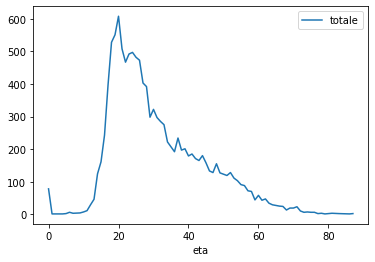

In [77]:
passaporti_completi[passaporti_completi.eta >= 0]['eta'].astype(
    int).value_counts().to_frame().reset_index().rename(columns={'eta': 'totale', 'index': 'eta'}).sort_values("eta").plot("eta")

In [78]:
donne = passaporti_completi[passaporti_completi['sesso'] == "F"]
uomini = passaporti_completi[passaporti_completi['sesso'] == "M"]


In [79]:
donne.shape

(908, 45)

In [80]:
uomini.shape


(11576, 45)

<AxesSubplot:xlabel='eta'>

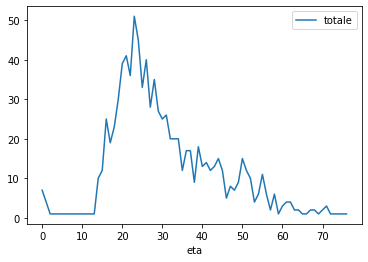

In [81]:
donne[donne.eta >= 0]['eta'].astype(
    int).value_counts().to_frame().reset_index().rename(columns={'eta':'totale','index':'eta'}).sort_values("eta").plot("eta")

In [82]:
donne[donne.eta >= 0]['eta'].astype(
    int).value_counts().to_frame().reset_index().rename(columns={'eta':'totale','index':'eta'}).sort_values("eta").to_csv("sequenza_eta_donne.csv", index=False)

<AxesSubplot:xlabel='eta'>

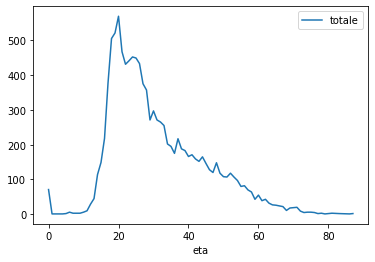

In [83]:
uomini[uomini.eta >= 0]['eta'].astype(
    int).value_counts().to_frame().reset_index().rename(columns={'eta':'totale','index':'eta'}).sort_values("eta").plot("eta")

In [84]:
uomini[uomini.eta >= 0]['eta'].astype(
    int).value_counts().to_frame().reset_index().rename(columns={'eta':'totale','index':'eta'}).sort_values("eta").to_csv("sequenza_eta_uomini.csv", index=False)

In [85]:
passaporti_completi.provenienza.value_counts().to_frame("totale").reset_index().rename(columns={'luogo':'totale'}).sort_values("totale").to_csv("totale_luoghi_nascita.csv", index=False)

In [86]:
eta_uomini = pd.read_csv("sequenza_eta_uomini.csv")
eta_donne = pd.read_csv("sequenza_eta_donne.csv")

In [87]:
eta_donne_uomini = eta_donne.merge(eta_uomini, left_on='eta', right_on='eta', how='inner')


In [88]:
eta_donne_uomini['totale'] = eta_donne_uomini.totale_x + eta_donne_uomini.totale_y


In [89]:
eta_donne_uomini.rename(columns = {'totale_x':'donne','totale_y':'uomini'}, inplace=True)

In [90]:
elenco_eta = list(range(eta_donne_uomini.eta.min(),eta_donne_uomini.eta.max()+1))


In [91]:
for i in list(set(elenco_eta) - set(eta_donne_uomini.eta.unique().tolist())):
    eta_donne_uomini = eta_donne_uomini.append({'eta': i}, ignore_index=True)


/tmp/ipykernel_12269/2060035853.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eta_donne_uomini = eta_donne_uomini.append({'eta': i}, ignore_index=True)
/tmp/ipykernel_12269/2060035853.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eta_donne_uomini = eta_donne_uomini.append({'eta': i}, ignore_index=True)
/tmp/ipykernel_12269/2060035853.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eta_donne_uomini = eta_donne_uomini.append({'eta': i}, ignore_index=True)
/tmp/ipykernel_12269/2060035853.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eta_donne_uomini = eta_donne_uomini.append({'eta': i}, ignore_index=True)
/tmp/ipykern

In [92]:
eta_donne_uomini = eta_donne_uomini.fillna(0)


In [93]:
eta_donne_uomini = eta_donne_uomini.sort_values('eta')

In [94]:
print("['eta', 'totale', 'donne', 'uomini'],")
for idx, row in eta_donne_uomini.iterrows():
    print("[%s, %s, %s, %s]," % (int(row.eta), int(row.totale), int(row.donne), int(row.uomini)))

['eta', 'totale', 'donne', 'uomini'],
[0, 78, 7, 71],
[1, 0, 0, 0],
[2, 0, 0, 0],
[3, 0, 0, 0],
[4, 0, 0, 0],
[5, 0, 0, 0],
[6, 0, 0, 0],
[7, 0, 0, 0],
[8, 0, 0, 0],
[9, 4, 1, 3],
[10, 7, 1, 6],
[11, 11, 1, 10],
[12, 0, 0, 0],
[13, 46, 1, 45],
[14, 124, 10, 114],
[15, 161, 12, 149],
[16, 243, 25, 218],
[17, 396, 19, 377],
[18, 528, 23, 505],
[19, 551, 30, 521],
[20, 608, 39, 569],
[21, 508, 41, 467],
[22, 467, 36, 431],
[23, 492, 51, 441],
[24, 497, 45, 452],
[25, 482, 33, 449],
[26, 473, 40, 433],
[27, 403, 28, 375],
[28, 392, 35, 357],
[29, 298, 27, 271],
[30, 322, 25, 297],
[31, 297, 26, 271],
[32, 285, 20, 265],
[33, 275, 20, 255],
[34, 222, 20, 202],
[35, 207, 12, 195],
[36, 192, 17, 175],
[37, 234, 17, 217],
[38, 197, 9, 188],
[39, 201, 18, 183],
[40, 179, 13, 166],
[41, 185, 14, 171],
[42, 171, 12, 159],
[43, 165, 13, 152],
[44, 180, 15, 165],
[45, 158, 12, 146],
[46, 133, 5, 128],
[47, 128, 8, 120],
[48, 155, 7, 148],
[49, 127, 9, 118],
[50, 123, 15, 108],
[51, 119, 12, 107],
[

In [95]:
print("['eta', 'uomini','donne']")
for idx, row in eta_donne_uomini.iterrows():
    print("[%s, %s, %s," % (int(row.eta),int(row.uomini), int(row.donne)))


['eta', 'uomini','donne']
[0, 71, 7,
[1, 0, 0,
[2, 0, 0,
[3, 0, 0,
[4, 0, 0,
[5, 0, 0,
[6, 0, 0,
[7, 0, 0,
[8, 0, 0,
[9, 3, 1,
[10, 6, 1,
[11, 10, 1,
[12, 0, 0,
[13, 45, 1,
[14, 114, 10,
[15, 149, 12,
[16, 218, 25,
[17, 377, 19,
[18, 505, 23,
[19, 521, 30,
[20, 569, 39,
[21, 467, 41,
[22, 431, 36,
[23, 441, 51,
[24, 452, 45,
[25, 449, 33,
[26, 433, 40,
[27, 375, 28,
[28, 357, 35,
[29, 271, 27,
[30, 297, 25,
[31, 271, 26,
[32, 265, 20,
[33, 255, 20,
[34, 202, 20,
[35, 195, 12,
[36, 175, 17,
[37, 217, 17,
[38, 188, 9,
[39, 183, 18,
[40, 166, 13,
[41, 171, 14,
[42, 159, 12,
[43, 152, 13,
[44, 165, 15,
[45, 146, 12,
[46, 128, 5,
[47, 120, 8,
[48, 148, 7,
[49, 118, 9,
[50, 108, 15,
[51, 107, 12,
[52, 118, 10,
[53, 107, 4,
[54, 97, 6,
[55, 80, 11,
[56, 82, 6,
[57, 70, 2,
[58, 64, 6,
[59, 43, 1,
[60, 55, 3,
[61, 39, 4,
[62, 43, 4,
[63, 32, 2,
[64, 27, 2,
[65, 26, 1,
[66, 24, 1,
[67, 22, 2,
[68, 11, 2,
[69, 18, 1,
[70, 0, 0,
[71, 20, 3,
[72, 9, 1,
[73, 5, 1,
[74, 6, 1,
[75, 0, 0,
[76, 5, 1,


In [96]:
luoghi = passaporti_completi.provenienza.value_counts().to_frame("totale").reset_index().rename(columns={'luogo':'totale', "index":"luogo"}).sort_values("totale")

In [97]:
comunita_key = [
       'Val di Fiemme', 'Giudicarie', 'Altipiani Cimbri', 'Val di Fassa',
       'Alto Garda e Ledro', 'Vallagarina', 'Valle di Cembra', 
       'Val di Sole', 'Primiero', 'Valsugana e Tesino', 
       'Altopiano della Paganella', 'Piana Rotaliana',
       'Valle dei Laghi', 'Val di Non', 'Val di Cembra',
       "Valle delĺ'Adige", 'Alta Valsugana e Bersntol']


In [98]:
luoghi = luoghi[luoghi.luogo.isin(comunita_key)]


In [99]:
def percento(value,totale):
    p = (value/totale)*100
    p = round(p,2)
    return(p)

In [100]:
luoghi['percento']= luoghi.totale.apply(lambda x: percento(x,luoghi.totale.sum()))

In [101]:
migrazioni = ['africa','america','asia','austria','austra_ungheria',
'bosnia_erzegovina','europa','esteri_europa','francia','germania','italia','svizzera',
'turchia','ungheria']
anni = []
for anno in passaporti_completi.data.unique():
    if (pd.isna(anno)):
        continue
    else:
        anni.append(int(anno))


In [102]:
passaporti_anni = passaporti_completi[passaporti_completi.data.isin(anni)]

In [103]:
data = {}
passaporti_anni['data'] = passaporti_anni.data.astype(int)


In [104]:
passaporti_anni[passaporti_anni['germania'] == 1].data.max()


1899

In [105]:
data = {}
for migrazione in migrazioni:
    migrazione_passaporti = passaporti_completi[passaporti_completi[migrazione] == 1]
    years = {}
    for anno in anni: 
        anno_migrazione = migrazione_passaporti[migrazione_passaporti.data == anno]
        years[anno] = anno_migrazione[migrazione].sum()
    years = sorted(years.items())
    data[migrazione] = years

In [106]:
range_anni = list(range(1878, 1901))
datimigrazioni = {}
anni = [] 
totale = []
destinazione = []
for migrazione in migrazioni:
    for values in data[migrazione]:
        #print("['%s', %s, '%s']," % (values[0],values[1],migrazione))
        if (values[0] in range_anni):
            anni.append(values[0])
            totale.append(values[1])
            destinazione.append(migrazione)
            #print("['%s', %s, '%s']," % (values[0],values[1],migrazione))
        else:
            anni.append(0)
            totale.append(0)
            destinazione.append(migrazione)
datimigrazioni = {
    'anno': anni,
    'totale': totale,
    'destinazione':  destinazione
}
pd.DataFrame(datimigrazioni).to_csv("datimigrazione_passaporti.csv", index=False)


In [107]:
migrazione_passaporti = pd.read_csv("datimigrazione_passaporti.csv")
migrazione_rinnovi = pd.read_csv("datimigrazione_rinnovi.csv")


In [108]:
migrazione_passaporti


,anno,totale,destinazione
0,1878,0,africa
1,1879,0,africa
2,1880,0,africa
3,1881,0,africa
4,1882,3,africa
...,...,...,...
317,1896,0,ungheria
318,1897,0,ungheria
319,1898,0,ungheria
320,1899,0,ungheria


In [109]:
for idx, row in migrazione_passaporti.iterrows():
    migrazione_passaporti.loc[idx,'totale'] = migrazione_passaporti.loc[idx,'totale'] + migrazione_rinnovi.loc[idx,'totale']

In [110]:
for idx, row in migrazione_passaporti.iterrows():
    print("['%s', %s, '%s']," % (row['anno'],row['totale'],row['destinazione']))


['1878', 0, 'africa'],
['1879', 0, 'africa'],
['1880', 0, 'africa'],
['1881', 0, 'africa'],
['1882', 3, 'africa'],
['1883', 0, 'africa'],
['1884', 0, 'africa'],
['1885', 0, 'africa'],
['1886', 0, 'africa'],
['1887', 0, 'africa'],
['1888', 0, 'africa'],
['1889', 7, 'africa'],
['1890', 0, 'africa'],
['1891', 3, 'africa'],
['1892', 1, 'africa'],
['1893', 1, 'africa'],
['1894', 2, 'africa'],
['1895', 1, 'africa'],
['1896', 0, 'africa'],
['1897', 0, 'africa'],
['1898', 2, 'africa'],
['1899', 1, 'africa'],
['1900', 0, 'africa'],
['1878', 2, 'america'],
['1879', 10, 'america'],
['1880', 10, 'america'],
['1881', 12, 'america'],
['1882', 54, 'america'],
['1883', 19, 'america'],
['1884', 3, 'america'],
['1885', 9, 'america'],
['1886', 13, 'america'],
['1887', 11, 'america'],
['1888', 62, 'america'],
['1889', 270, 'america'],
['1890', 193, 'america'],
['1891', 172, 'america'],
['1892', 32, 'america'],
['1893', 31, 'america'],
['1894', 21, 'america'],
['1895', 41, 'america'],
['1896', 25, 'america

In [111]:
merge_passaporti_rinnovi = migrazione_rinnovi.merge(migrazione_passaporti,on="anno")

In [112]:
merge_passaporti_rinnovi.shape

(4508, 5)

In [113]:
for migrazione in migrazioni:
    line = "["
    for values in data[migrazione]:
        line += str(values[1]) + ", "
    line += "]"
    line = line.replace(", ]","]")
    print(migrazione)
    print(line)


africa
[0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 7, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
america
[2, 10, 9, 11, 52, 18, 2, 6, 9, 9, 59, 257, 177, 147, 1, 1, 0, 0, 0, 0, 0, 0, 0]
asia
[0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 7, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
austria
[8, 4, 6, 4, 459, 99, 24, 15, 10, 15, 38, 354, 333, 792, 1, 4, 3, 1, 0, 0, 1, 0, 0]
austra_ungheria
[187, 121, 162, 152, 570, 204, 42, 46, 33, 22, 234, 1046, 655, 494, 8, 8, 0, 0, 2, 3, 1, 3, 0]
bosnia_erzegovina
[53, 2, 0, 2, 14, 21, 1, 1, 0, 0, 2, 10, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
europa
[26, 22, 29, 26, 37, 30, 28, 15, 22, 59, 552, 1245, 1046, 362, 8, 9, 4, 3, 4, 1, 5, 3, 1]
esteri_europa
[5, 0, 12, 27, 11, 6, 4, 0, 0, 7, 9, 159, 13, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0]
francia
[10, 5, 5, 6, 294, 137, 3, 0, 1, 2, 49, 96, 43, 62, 1, 0, 0, 0, 0, 0, 0, 0, 0]
germania
[70, 50, 50, 46, 750, 187, 12, 15, 14, 5, 161, 757, 307, 606, 7, 4, 2, 1, 0, 1, 1, 1, 0]
italia
[67, 64, 76, 56, 332, 170, 33, 20, 17, 24, 103, 363, 141, 168, 2, 1, 0, 0, 0, 2, 0, 0

In [114]:
passaporti_completi[passaporti_completi.data == 1909]


,nome,data_nascita,luogo_nascita,sesso,mestiere,data,validita,espatri,rinnovi,n_rinnovi,...,austra_ungheria,bosnia_erzegovina,europa,esteri_europa,francia,germania,italia,svizzera,turchia,ungheria


In [115]:
passaporti_completi[passaporti_completi.provenienza ==
                    "Val di Non"].luogo_nascita.value_counts().to_frame().reset_index().rename(columns={"index":"luogo_nascita","luogo_nascita":"totale"}).to_csv("val_di_non_ripartizioni.csv",index=False)


In [116]:
passaporti_completi.migrazione_interna.sum()

6235

In [117]:
passaporti_completi.migrazione_europa.sum()

8135

In [118]:
passaporti_completi.migrazione_extra_europa.sum()

798

In [119]:
passaporti_completi[passaporti_completi.provenienza == 'Val di Non'].migrazione_interna.sum()


613

In [120]:
passaporti_completi[passaporti_completi.provenienza ==
                    'Val di Non'].migrazione_extra_europa.sum()


82

In [121]:
passaporti_completi[passaporti_completi.provenienza == 'Val di Non'].austria.sum()

253

In [122]:
passaporti_completi[passaporti_completi.provenienza ==
                    'Val di Non'].italia.sum()


222

In [123]:
passaporti_completi[passaporti_completi.provenienza ==
                    'Val di Non'].francia.sum()

56

In [124]:
passaporti_completi[passaporti_completi.provenienza ==
                    'Val di Non'].germania.sum()


253

In [125]:
passaporti_completi[passaporti_completi.provenienza ==
                    'Val di Non'].america.sum()


80

In [126]:
passaporti_completi[passaporti_completi.provenienza ==
                    'Val di Non'].asia.sum()


0

In [127]:
passaporti_completi.lavoro.value_counts()

precario                     8833
agricoltura e allevamento     913
artigianale                   748
manuale                       520
commercio                     385
vario                         219
intellettuale e tecnico       170
domestico                     128
artistico                      38
impiegatizio                   34
militare                       33
clero                          27
sanitario                      16
Name: lavoro, dtype: int64

In [128]:
passaporti_completi[passaporti_completi.lavoro == "NO CATEGORIA"]


,nome,data_nascita,luogo_nascita,sesso,mestiere,data,validita,espatri,rinnovi,n_rinnovi,...,austra_ungheria,bosnia_erzegovina,europa,esteri_europa,francia,germania,italia,svizzera,turchia,ungheria


In [129]:
escludi_campi = ['espatri_0',
'espatri_1', 'espatri_2', 'espatri_3', 'espatri_4', 'espatri_5',
'migrazione_0', 'migrazione_1', 'migrazione_2', 'migrazione_3',
'migrazione_4', 'migrazione_5',]


In [130]:
includi_campi = ['nome', 'data_nascita', 'luogo_nascita', 'sesso', 'mestiere', 'data',
                  'validita', 'espatri']


In [131]:
passaporti_completi[includi_campi].to_csv("dati_passaporti.csv",sep=";",index=False)


In [132]:
for p in list(passaporti_completi.provenienza.unique()):
    if pd.isna(p) == False:
        africa = passaporti_completi[passaporti_completi.provenienza ==
                        i].africa.sum()
        if africa > 0:
            print(p)
            print(africa)


In [133]:
passaporti_completi[passaporti_completi.africa==1].provenienza

4                  Valle dei Laghi
2223     Alta Valsugana e Bersntol
4253              Valle delĺ'Adige
4290                           NaN
4410     Alta Valsugana e Bersntol
6646              Valle delĺ'Adige
6804               Valle dei Laghi
7553              Valle delĺ'Adige
7990                        Italia
8914     Alta Valsugana e Bersntol
9067              Valle delĺ'Adige
9689                              
10964              Piana Rotaliana
Name: provenienza, dtype: object

In [134]:
passaporti_completi.to_csv("passaporti_completi.csv",sep=";",index=False)

In [135]:
passaporti_completi.columns

Index(['nome', 'data_nascita', 'luogo_nascita', 'sesso', 'mestiere', 'data',
       'validita', 'espatri', 'rinnovi', 'n_rinnovi', 'lavoro',
       'mestiere_corretto', 'espatri_0', 'espatri_1', 'espatri_2', 'espatri_3',
       'espatri_4', 'espatri_5', 'migrazione_0', 'migrazione_1',
       'migrazione_2', 'migrazione_3', 'migrazione_4', 'migrazione_5', 'eta',
       'provenienza', 'luogo_nascita_corretto', 'durata_gg_passaporto',
       'migrazione_extra_europa', 'migrazione_europa', 'migrazione_interna',
       'africa', 'america', 'asia', 'austria', 'austra_ungheria',
       'bosnia_erzegovina', 'europa', 'esteri_europa', 'francia', 'germania',
       'italia', 'svizzera', 'turchia', 'ungheria'],
      dtype='object')

In [136]:
nodes = {}
ids = []
names = []
migrazioni = []
totale = []
i = 0
totale_migrazioni = 0
for p in places:
    if p != "":
        ids.append(i)
        names.append(p)
        #migrazioni.append(p)

        if p == "Africa":
            migrazioni.append("0") #extra europa
            t = passaporti_completi['africa'].sum()
            totale.append(t)
            totale_migrazioni += t
        if p == "America":
            migrazioni.append("0")
            t = passaporti_completi['america'].sum()
            totale.append(t)
            totale_migrazioni += t
        if p == "Asia":
            migrazioni.append("0")
            t=passaporti_completi['asia'].sum()
            totale.append(t)
            totale_migrazioni += t
        if p == "Austria":
            migrazioni.append("2") # interna
            t=passaporti_completi['austria'].sum()
            totale.append(t)
            totale_migrazioni += t
        if p == "Austria-Ungheria":
            migrazioni.append("2")
            t=passaporti_completi['austra_ungheria'].sum()
            totale.append(t)
            totale_migrazioni += t
        if p == "Bosnia-Erzegovina":
            migrazioni.append("2")
            t=passaporti_completi['bosnia_erzegovina'].sum()
            totale.append(t)
            totale_migrazioni += t
        if p == "Esteri d'Europa":
            migrazioni.append("1") #europa 
            t=passaporti_completi['esteri_europa'].sum()
            totale.append(t)
            totale_migrazioni += t
        if p == "Europa":
            migrazioni.append("1")  # europa
            t=passaporti_completi['europa'].sum()
            totale.append(t)
            totale_migrazioni += t
        if p == "Francia":
            migrazioni.append("1") #europa
            t=passaporti_completi['francia'].sum()
            totale.append(t)
            totale_migrazioni += t
        if p == "Germania":
            migrazioni.append("1")  # europa
            t=passaporti_completi['germania'].sum()
            totale.append(t)
            totale_migrazioni += t
        if p == "Italia":
            migrazioni.append("1") #europa
            t=passaporti_completi['italia'].sum()
            totale.append(t)
            totale_migrazioni += t
        if p == "Svizzera":
            migrazioni.append("1") #europa
            t=passaporti_completi['svizzera'].sum()
            totale.append(t)
            totale_migrazioni += t

        if p == "Turchia":
            migrazioni.append("0")  # extra europa
            t=passaporti_completi['turchia'].sum()
            totale.append(t)
            totale_migrazioni += t
        if p == "Ungheria":
            t=passaporti_completi['ungheria'].sum()
            migrazioni.append("2")  # interna
            totale.append(t)
            totale_migrazioni += t
        i += 1


In [137]:
last_id_migrazioni = i -1
totale_provenienze = 0


In [138]:
id_comunita_key = {'Val di Fiemme':3,
                   'Giudicarie':4,
                   'Altipiani Cimbri':5,
                   'Val di Fassa':6,
                   'Alto Garda e Ledro':7,
                   'Vallagarina':8,
                   'Valle di Cembra':9,
                   'Val di Sole':10,
                   'Primiero':11,
                   'Valsugana e Tesino':12,
                   'Altopiano della Paganella':13,
                   'Piana Rotaliana':14,
                   'Valle dei Laghi':15,
                   'Val di Non':16,
                   'Val di Cembra':17,
                   "Valle delĺ'Adige":18,
                   'Alta Valsugana e Bersntol':19}


In [139]:
for n in comunita_key: 
    ids.append(i)
    names.append(n)
    migrazioni.append(str(id_comunita_key[n]))  # 3 trentino
    t = passaporti_completi[passaporti_completi.provenienza ==
                            n].shape[0]
    totale_provenienze += t
    totale.append(t)
    i += 1


In [140]:
nodes = {
    'id': ids,
    'name': names,
    'category': migrazioni,
    'value': totale
}
nodes_df = pd.DataFrame(nodes)



In [141]:
def getPercentoSize(last_id_migrazioni,totale_provenienze,totale_migrazioni,id,df):
    p = 0
    totale = df[df.id == id]['value'].values[0]
    if (id <= last_id_migrazioni):
        p = round(totale / totale_migrazioni,3)*100+20
    else:
        p = round(totale / totale_provenienze, 3)*100+20
    return(p)

In [142]:
nodes_df['symbolSize'] = nodes_df['id'].apply(lambda x: getPercentoSize(last_id_migrazioni,totale_provenienze,totale_migrazioni,x,nodes_df))

In [143]:
nodes_df.to_csv(
    "graph_nodes.csv", index=False)

In [144]:
#for idx, row in nodes_df.iterrows():
#    print('{ "id": "%s", "name": "%s", "category": %s, "symbolSize":%s, "value":%s},\n' % (
#        row['id'], row['name'], row['category'], row['symbolSize'], row['value']))


In [145]:
for idx, row in nodes_df.iterrows():
    name = row['name']
    if name in places:
        print('''{"name": "%s", "value":%s,
                "label": { "show": true, "position": "top",
                    "verticalAlign": "top", "distance": 0,
                    "rotate": 25}}, \n''' % (row['name'], 1))
    else:
        print('{"name": "%s", "value":%s},\n' % (row['name'], 1))


{"name": "Svizzera", "value":1,
                "label": { "show": true, "position": "top",
                    "verticalAlign": "top", "distance": 0,
                    "rotate": 25}}, 

{"name": "Francia", "value":1,
                "label": { "show": true, "position": "top",
                    "verticalAlign": "top", "distance": 0,
                    "rotate": 25}}, 

{"name": "Turchia", "value":1,
                "label": { "show": true, "position": "top",
                    "verticalAlign": "top", "distance": 0,
                    "rotate": 25}}, 

{"name": "Europa", "value":1,
                "label": { "show": true, "position": "top",
                    "verticalAlign": "top", "distance": 0,
                    "rotate": 25}}, 

{"name": "Germania", "value":1,
                "label": { "show": true, "position": "top",
                    "verticalAlign": "top", "distance": 0,
                    "rotate": 25}}, 

{"name": "Austria-Ungheria", "value":1,
                "la

In [146]:
nazioni = {0:'africa',3:'america',9:'asia',8:'austria',10:'austra_ungheria',1:'bosnia_erzegovina',13:'europa',
6:'esteri_europa',11:'francia',2:'germania',12:'italia',4:'svizzera',
5:'turchia', 7:'ungheria'}

In [147]:
nazioni_nomi = {"africa":"Africa", "america": "America", "asia": "Asia", 
           "austria": "Austria", "austra_ungheria": "Austria-Ungheria", 
           "bosnia_erzegovina": "Bosnia-Erzegovina",
           "europa": "Europa","esteri_europa":"Esteri d'Europa",
           "francia":"Francia","germania":"Germania",
           "italia":"Italia","svizzera":"Svizzera",
           "turchia":"Turchia","ungheria":"Ungheria"}

In [148]:
#weights = []
#from_ids = []
#to_ids = []
#for comunita in comunita_key:
#    id_comunita = nodes_df[nodes_df.name == comunita].id.values[0]
#    for id_nazione in nazioni:
#        nazione = nazioni[id_nazione]
#        weight = passaporti_completi[passaporti_completi.provenienza ==
#                                     comunita][nazione].sum()
#        from_ids.append(id_comunita)
#        to_ids.append(id_nazione)
#        weights.append(weight)

In [149]:
weights = []
from_ids = []
to_ids = []
for comunita in comunita_key:
    id_comunita = nodes_df[nodes_df.name == comunita].id.values[0]
    for id_nazione in nazioni:
        nazione = nazioni[id_nazione]
        weight = passaporti_completi[passaporti_completi.provenienza ==
                                     comunita][nazione].sum()
        from_ids.append(comunita)
        to_ids.append(nazioni_nomi[nazione])
        weights.append(weight)

In [150]:
edges = {
    'source': from_ids,
    'target': to_ids,
    'weight': weights
}
edges_df = pd.DataFrame(edges)


In [151]:
edges_df.to_csv(
    "edges_nodes.csv", index=False)


In [158]:
for idx, row in edges_df.iterrows():
    if row.weight > 0:
       #print('{ "source": "%s", "target": "%s" },\n' %
       #     (row.source, row.target))
        print('''{ "source": "%s", "target": "%s", "value":%s, "weights":%s
                 ,"lineStyle": {"opacity": 1}
              },\n''' % (row.source, row.target, 0, row.weight))


{ "source": "Val di Fiemme", "target": "America", "value":0, "weights":2
                 ,"lineStyle": {"opacity": 1}
              },

{ "source": "Val di Fiemme", "target": "Austria-Ungheria", "value":0, "weights":3
                 ,"lineStyle": {"opacity": 1}
              },

{ "source": "Val di Fiemme", "target": "Germania", "value":0, "weights":4
                 ,"lineStyle": {"opacity": 1}
              },

{ "source": "Val di Fiemme", "target": "Italia", "value":0, "weights":2
                 ,"lineStyle": {"opacity": 1}
              },

{ "source": "Giudicarie", "target": "America", "value":0, "weights":1
                 ,"lineStyle": {"opacity": 1}
              },

{ "source": "Giudicarie", "target": "Austria", "value":0, "weights":4
                 ,"lineStyle": {"opacity": 1}
              },

{ "source": "Giudicarie", "target": "Austria-Ungheria", "value":0, "weights":3
                 ,"lineStyle": {"opacity": 1}
              },

{ "source": "Giudicarie", "targe

In [153]:
migrazione_extra_europa = 0
migrazione_europa = 0
migrazione_interna = 0


espatrio	migrazione
Africa	extra europa
America	extra europa
Asia	extra europa
Austria	interna
Austria-Ungheria	interna
Bosnia-Erzegovina	interna
Esteri d'Europa	europa
Europa	europa
Francia	europa
Germania	europa
Italia	europa
Svizzera	europa
Turchia	extra europa
Ungheria	interna

In [154]:
interna = ["Austria-Ungheria","Austria","Ungheria","Bosnia-Erzegovina"]
europa = ["Italia", "Europa", "Francia", "Svizzera","Germania"]
extra_europa = ["Africa","America","Asia"]

In [155]:
nodes_df[nodes_df.name.isin(interna)].value.sum()

6756

In [156]:
nodes_df[nodes_df.name.isin(europa)].value.sum()


9895

In [157]:
nodes_df[nodes_df.name.isin(extra_europa)].value.sum()


798